In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write t1o the current directory are saved as output.

['Traffic_Violations.csv']


In [36]:
#Reading csv
traffic=pd.read_csv("../input/Traffic_Violations.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
#sorting according to date
traffic.sort_values(['Date Of Stop','Time Of Stop'],ascending=[True,True])

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
637672,01/01/2012,00:43:00,MCP,Headquarters and Special Operations,LEFT TURN FROM IMPROPER ROAD POSITION,FENTON AT CAMERON,39.001020,-77.033344,No,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,2009.0,INFINITY,G37X,SILVER,Warning,21-601(b),Transportation Article,No,WHITE,M,HERNDON,VA,VA,A - Marked Patrol,"(39.0010204333333, -77.0333436)"
119804,01/01/2012,00:52:00,MCP,"3rd district, Silver Spring",KNOWINGLY DRIVING UNINSURED VEHICLE,PINEY BRANCH ROAD @ ARLISS STREET,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2000.0,NISSAN,SENTRA,BLACK,Citation,17-107,Transportation Article,No,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
120290,01/01/2012,00:52:00,MCP,"3rd district, Silver Spring",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,PINEY BRANCH ROAD @ ARLISS STREET,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2000.0,NISSAN,SENTRA,BLACK,Citation,16-303(c),Transportation Article,No,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
120777,01/01/2012,00:52:00,MCP,"3rd district, Silver Spring",PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...,PINEY BRANCH ROAD @ ARLISS STREET,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2000.0,NISSAN,SENTRA,BLACK,Citation,16-303(h),Transportation Article,No,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
121262,01/01/2012,00:52:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,PINEY BRANCH ROAD @ ARLISS STREET,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2000.0,NISSAN,SENTRA,BLACK,Citation,21-902(a1),Transportation Article,No,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
121743,01/01/2012,00:52:00,MCP,"3rd district, Silver Spring",DRIVING WHILE IMPAIRED BY ALCOHOL,PINEY BRANCH ROAD @ ARLISS STREET,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2000.0,NISSAN,SENTRA,BLACK,Citation,21-902(b1),Transportation Article,No,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
122229,01/01/2012,00:52:00,MCP,"3rd district, Silver Spring",DRIVER CONSUMING ALCOHOLIC BEVERAGE IN PASSENG...,PINEY BRANCH ROAD @ ARLISS STREET,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2000.0,NISSAN,SENTRA,BLACK,Citation,21-903(c),Transportation Article,No,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
122710,01/01/2012,00:52:00,MCP,"3rd district, Silver Spring",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,PINEY BRANCH ROAD @ ARLISS STREET,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2000.0,NISSAN,SENTRA,BLACK,Citation,16-112(c),Transportation Article,No,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
263812,01/01/2012,01:30:00,MCP,"4th district, Wheaton",FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID...,GEORGIA AVE (SB) / SHOREFIELD RD,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,MD,02 - Automobile,1994.0,DODGE,RAM PK,RED,Citation,21-801(b),Transportation Article,Yes,WHITE,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
264014,01/01/2012,01:30:00,MCP,"4th district, Wheaton",FOLLOWING VEH. TOO CLOSELY,GEORGIA AVE (SB) / SHOREFIELD RD,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,MD,02 - Automobile,1994.0,DODGE,RAM PK,RED,Citation,21-310(a),Transportation Article,Yes,WHITE,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN


In [38]:
#Adding column which is daily count of violations
traffic['Violations']=traffic.groupby('Date Of Stop')['Time Of Stop'].transform('count')

In [39]:
traffic1=traffic[['Date Of Stop','Time Of Stop','Violations']]

In [40]:
traffic1.sort_values(['Date Of Stop','Time Of Stop'],ascending=[True,True],inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:

traffic1.drop_duplicates(subset ="Date Of Stop", 
                     keep = 'first', inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
traffic1=traffic1[['Date Of Stop','Violations']]

In [43]:
traffic1.dtypes

Date Of Stop    object
Violations       int64
dtype: object

In [44]:
traffic1['Date Of Stop'] = pd.to_datetime(traffic1['Date Of Stop'])

In [45]:
traffic1.sort_values(['Date Of Stop'],ascending=[True],inplace=True)

In [46]:
traffic1['Year'] = traffic1['Date Of Stop'].apply(lambda x: x.year)
traffic1['Month'] = traffic1['Date Of Stop'].apply(lambda x: x.month)
traffic1.head()

,Date Of Stop,Violations,Year,Month
637672,2012-01-01,181,2012,1
794996,2012-01-02,334,2012,1
199316,2012-01-03,330,2012,1
774022,2012-01-04,364,2012,1
178679,2012-01-05,465,2012,1


In [47]:
# Splitting Training Set and Test Set into 80% AND 20%
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size=0.2)
tr_split = int((4/5) * traffic1.shape[0])
tr_split=tr_split+4
train = traffic1[:tr_split]
test = traffic1[tr_split:]






In [48]:
# Function for Linear Regression
def linear_regression_(x,y):
#     x = np.atleast_2d(x).T
    y = np.atleast_2d(y).T
    F = np.linalg.inv(np.dot(x.T,x))
    S = np.dot(x.T,y)
    return np.dot(F,S)




In [49]:
# Function for plotting
def plot(pred, test):
    plt.figure(figsize=(15,10))
    plt.title("Prediction vs Actual data")
    plt.xlabel("Day")
    plt.ylabel("Values")
    test = list(test.reshape(-1))
    plt.plot(pred)
    plt.plot(test)
    plt.legend(['Predicted', 'Actual'], prop={'size': 14})
    plt.savefig('a5_q5.jpg', bbox_inches='tight')
    plt.show()


# Percent Error function
def error(y, pred):
    y = y.flatten()
    pred = np.array(pred)
    # print((y.shape,pred.shape))
    M = (100 / y.shape[0]) * np.sum(np.abs(y-pred)/y)
    print("The percent error is: "+str(M))

    
# Exponentially Weighted Moving Average Function
def ewma(train, test, alpha):
    pred = [train[-1]]
    for i in range(test.shape[0] - 1):
        pred.extend([(alpha * test[i] + (1 - alpha) * pred[i])])
    return pred

# Seasonal last observed function
def seasonal(train, test, s):
    pred = []
    if s<len(test):
        for i in range (s):
            pred.extend([train[i - s]])
        for i in range(len(test)-s):
            pred.extend([pred[i]])
    else:
        for i in range(len(test)):
            pred.extend([train[i - s]])
    return pred


# Auto-regressor model function
def ar_model(train, test, p):
    x = []
    pred = []
    temp = train[:p].reshape(-1)[::-1]
    
    # targets
    y = train[p:]

    for i in range(y.shape[0]):
        x.append(np.insert(temp, 0, 1))
        temp = np.roll(temp, 1)
        temp[0] = y[i]
        
        
    for i in range(test.shape[0]):
        beta = linear_regression_(np.asarray(x), y.T)
        temp = np.roll(temp, 1)
        temp[0] = y[-1]
        new_x = np.insert(temp, 0, 1)
        pred.append(beta.T.dot(new_x)[0])
        x.append(new_x)
        y = np.append(y, test[i])
        y = y.reshape(-1, 1)
    return pred



'\n    x = []\n    pred = []\n    temp = train[:p].reshape(-1)[::-1]\n    \n    # targets\n    y = train[p:]\n\n    for i in range(y.shape[0]):\n        x.append(np.insert(temp, 0, 1))\n        temp = np.roll(temp, 1)\n        temp[0] = y[i]\n        \n        \n    for i in range(test.shape[0]):\n        beta = linear_regression_(np.asarray(x), y.T)\n        temp = np.roll(temp, 1)\n        temp[0] = y[-1]\n        new_x = np.insert(temp, 0, 1)\n        pred.append(beta.T.dot(new_x)[0])\n        x.append(new_x)\n        y = np.append(y, test[i])\n        y = y.reshape(-1, 1)\n        \n    return pred\n'

In [50]:
#converting to array for calculations
train1=np.asarray(train['Violations'])
test1=np.asarray(test['Violations'])

In [51]:
train1.shape

(1461,)

In [52]:
test1.shape

(361,)

In [56]:
#EWMA 
out=[]
errorl=[]
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in range(len(alpha)):
    print("For alpha"+str(alpha[i]))
    result=ewma(train1, test1, alpha[i])
    out.append(result)
    errorl.append(error(test1, result))
    


For alpha0.1
The percent error is: 49.96535271584399
For alpha0.2
The percent error is: 45.92957623561957
For alpha0.3
The percent error is: 43.290157279042255
For alpha0.4
The percent error is: 41.37035681823988
For alpha0.5
The percent error is: 39.75659907523292
For alpha0.6
The percent error is: 38.35251490584929
For alpha0.7
The percent error is: 36.92770736997225
For alpha0.8
The percent error is: 35.73133881652407
For alpha0.9
The percent error is: 34.82993465713091


The percent error is: 34.82993465713091


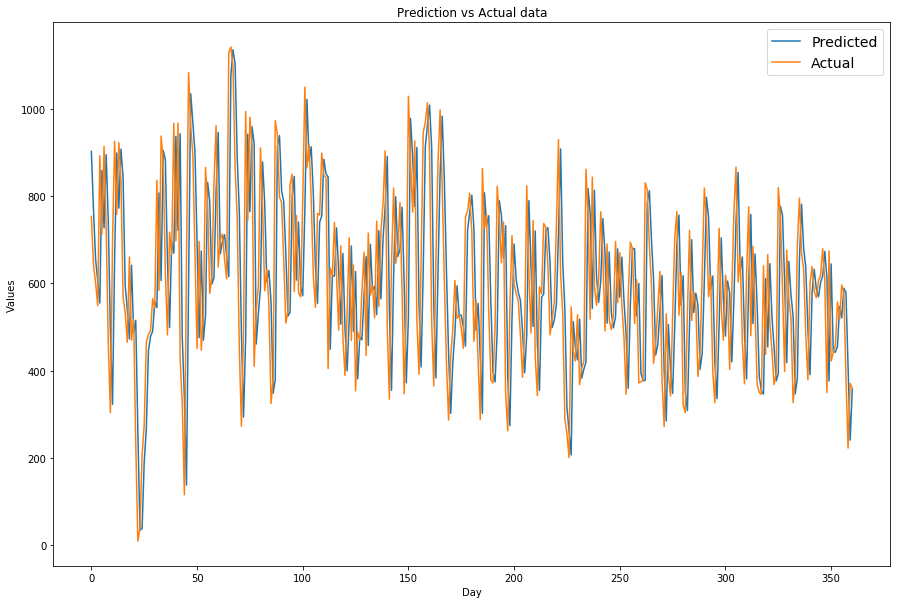

In [57]:
out = ewma(train1,test1, 0.9)
error(test1, out)
plot(out, test1)

The percent error is: 63.24368368523509


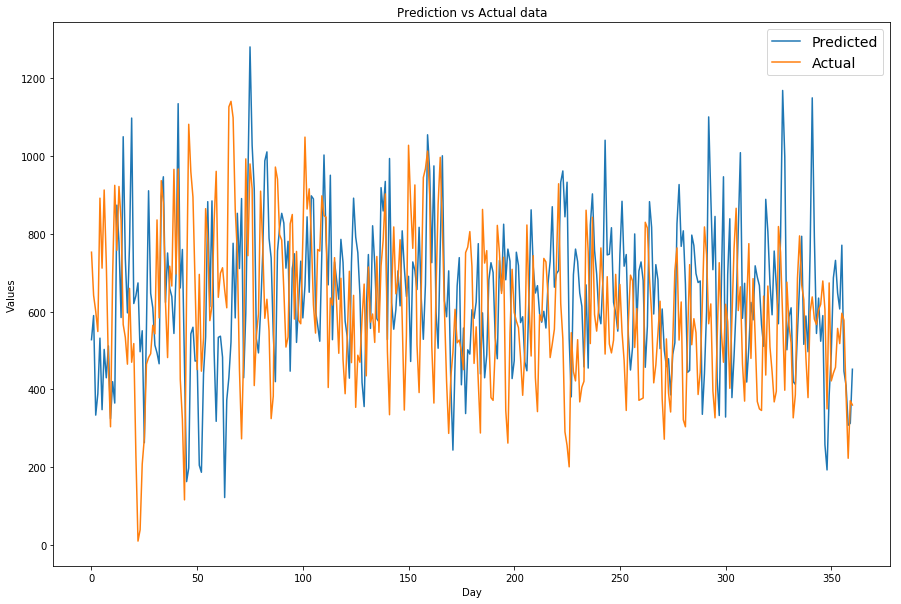

In [58]:
#Seasonal Yearly weekly monthly and 6 monthly quarterly 
#Yearly

out = seasonal(train1, test1, 365)
error(test1, out)
plot(out, test1)
outy=out


The percent error is: 52.12656585455939


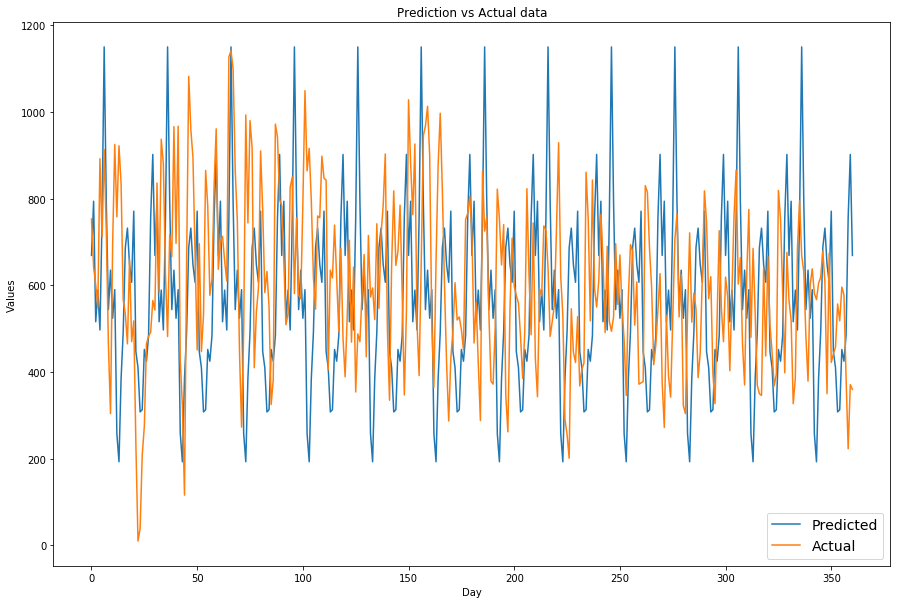

In [59]:
#monthly

out = seasonal(train1, test1, 30)
error(test1, out)
plot(out, test1)
outm=out

The percent error is: 64.00849991587302


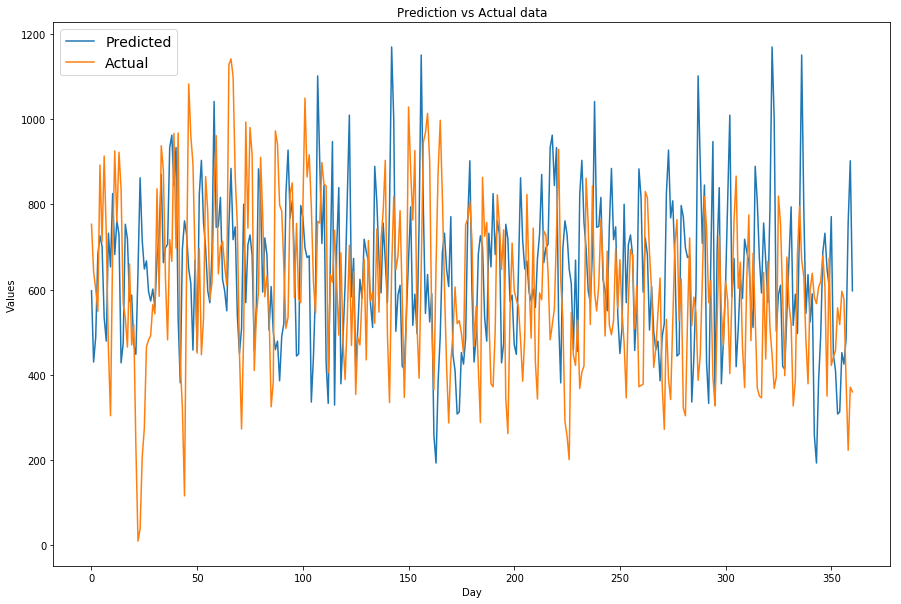

In [60]:
#6monthly
out = seasonal(train1, test1, 180)
error(test1, out)
plot(out, test1)
outhm=out

The percent error is: 57.55123669083638


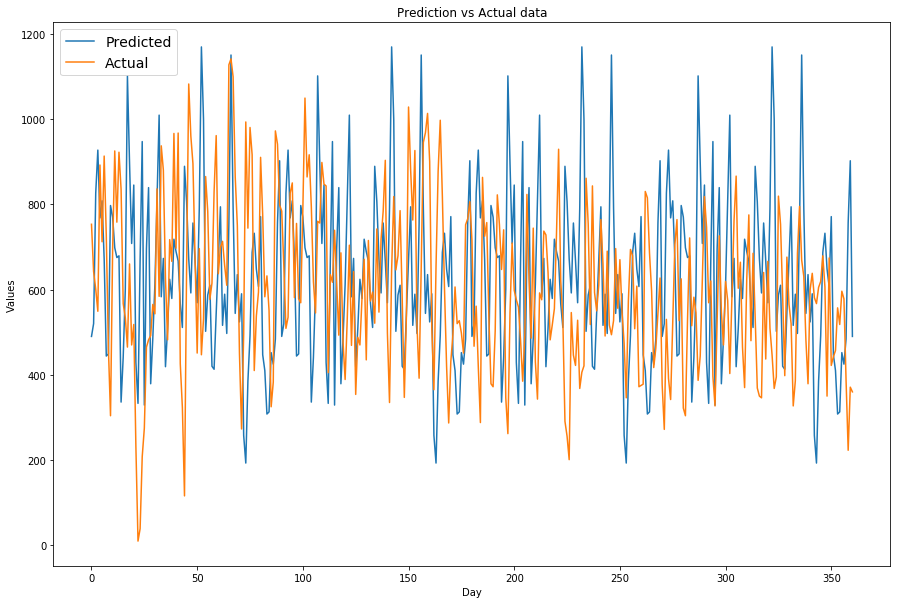

In [61]:
#Quarterly 
out = seasonal(train1, test1, 90)
error(test1, out)
plot(out, test1)
outqm=out

The percent error is: 45.00632060065648


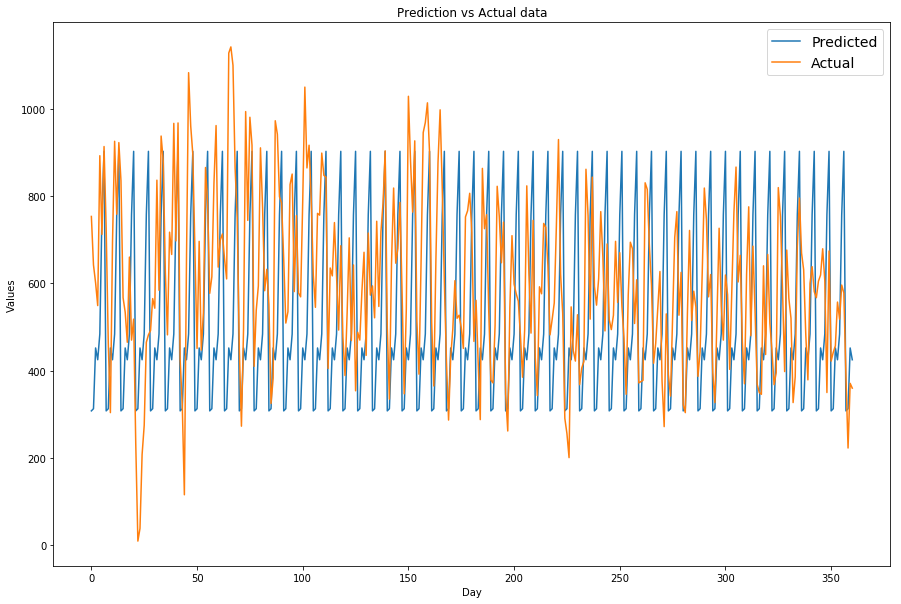

In [62]:
#weekly
out = seasonal(train1, test1, 7)
error(test1, out)
plot(out, test1)
outw=out

The percent error is: 33.02511128110842


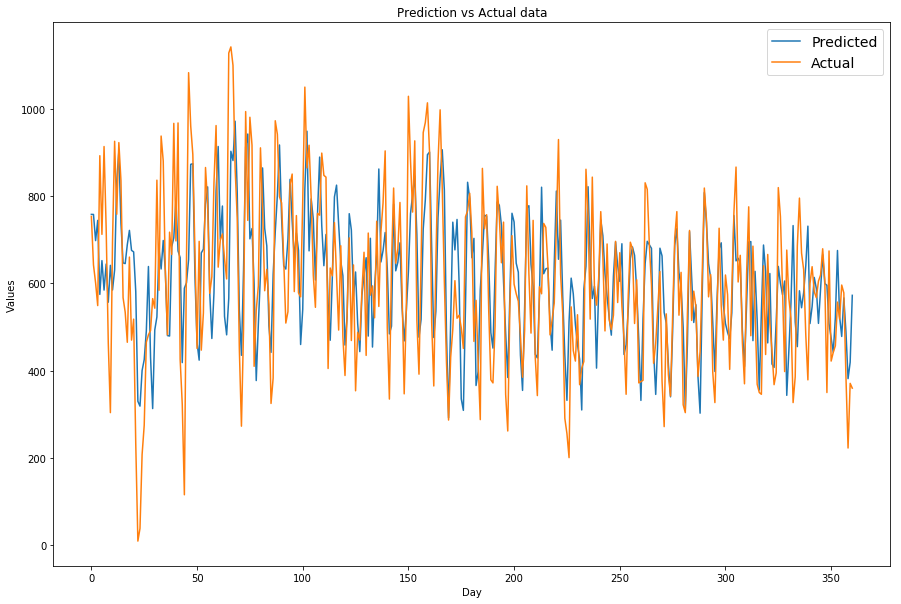

In [63]:
# AR model with different p values
out = ar_model(train1, test1, 144)
error(test1, out)
plot(out, test1)


In [67]:
p_val=[1,7,30,90,120,180,365]
for i in range(len(p_val)):
    print("For "+str(p_val[i]))
    result=ar_model(train1, test1, p_val[i])
    out.append(result)
    errorl.append(error(test1, result))
    


For 1
The percent error is: 36.33938195245626
For 7
The percent error is: 36.195103620827034
For 30
The percent error is: 33.55820278152194
For 90
The percent error is: 32.90773615540537
For 120
The percent error is: 32.205704581708325
For 180
The percent error is: 34.6970196770495
For 365
The percent error is: 37.39634414710082


The percent error is: 32.205704581708325


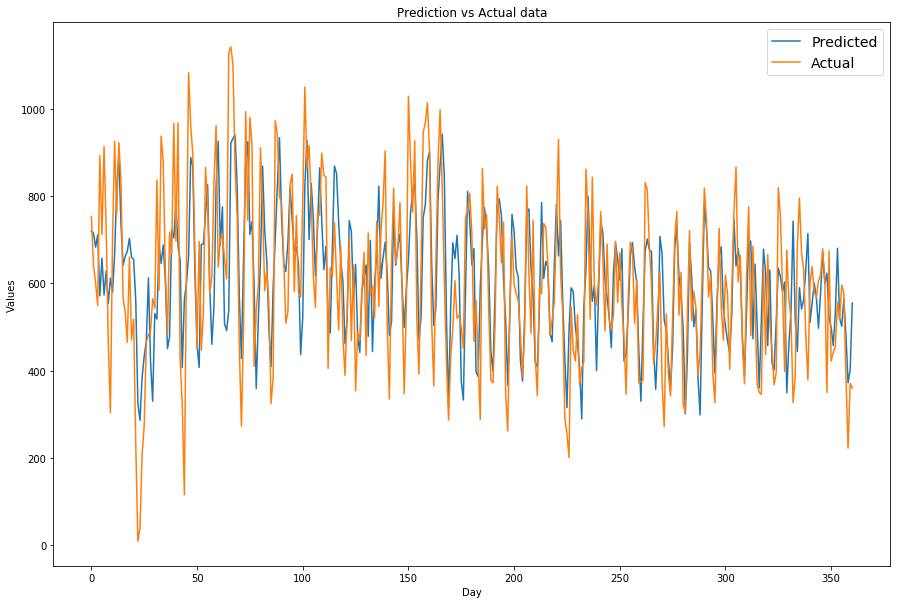

In [68]:
out = ar_model(train1, test1, 120)
error(test1, out)
plot(out, test1)

**Time series analysis**

Seasonal:

Inference:Traffic violations tend to be weekly periodic 

This makes sense as the working routine of people is roughly weekly periodic the traffic conditions also tend to be weekly  periodic 

EWMA:

Hypothesis : More weight should be given to the recent observations to predict the future number of traffic violations 

We can infer this as in our example α=0.9 gives minimum error.
The bigger the value of  α which gives the minimum error is, the more influence the recent observations have on the predictions. 
The hypothesis makes  logical sense because traffic conditions change over period of time and so prediction of future traffic condition should be based  more on recent observations.
Hence recent trends in traffic violations influence the predictions more . 

AR model:
The method is not suitable because of the presence of strong seasonal component in the data.